In [22]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/weather_2020-11.csv', encoding='utf-8')
data.ParameterValue = pd.to_numeric(data['ParameterValue'], errors='coerce')
data = data.dropna(subset=['ParameterValue'])

parameter_avg = data.groupby('ParameterName')['ParameterValue'].mean().reset_index()
print(parameter_avg[parameter_avg.ParameterName.str[-3:] == 'AVG'])

  ParameterName  ParameterValue
0   PA_PT1H_AVG     1012.634146
1   RH_PT1H_AVG       87.901387
2   TA_PT1H_AVG        2.740029
5   WD_PT1H_AVG      208.793400
6   WS_PT1H_AVG        3.900717


In [23]:
result = data.groupby('ParameterName')['ParameterValue'].agg([np.min, np.max, np.median])
print(result)

                 min     max  median
ParameterName                       
PA_PT1H_AVG    977.3  1032.6  1013.7
RH_PT1H_AVG     61.0   100.0    89.0
TA_PT1H_AVG     -8.4    10.9     2.8
TA_PT1H_MAX     -7.8    11.1     3.0
TA_PT1H_MIN     -9.1    10.9     2.5
WD_PT1H_AVG      4.0   359.0   188.0
WS_PT1H_AVG      0.4    10.3     3.7
WS_PT1H_MAX      0.7    12.3     4.4
WS_PT1H_MIN      0.1     9.5     3.1


In [24]:
highest_hour = data.groupby('ParameterName').agg(
    Max_Time=('Time', lambda x: x[data.loc[x.index]['ParameterValue'].idxmax()])
)

print(highest_hour)

                           Max_Time
ParameterName                      
PA_PT1H_AVG    2020-11-10T18:00:00Z
RH_PT1H_AVG    2020-11-12T13:00:00Z
TA_PT1H_AVG    2020-11-03T06:00:00Z
TA_PT1H_MAX    2020-11-03T06:00:00Z
TA_PT1H_MIN    2020-11-03T06:00:00Z
WD_PT1H_AVG    2020-11-27T10:00:00Z
WS_PT1H_AVG    2020-11-02T12:00:00Z
WS_PT1H_MAX    2020-11-02T14:00:00Z
WS_PT1H_MIN    2020-11-02T12:00:00Z


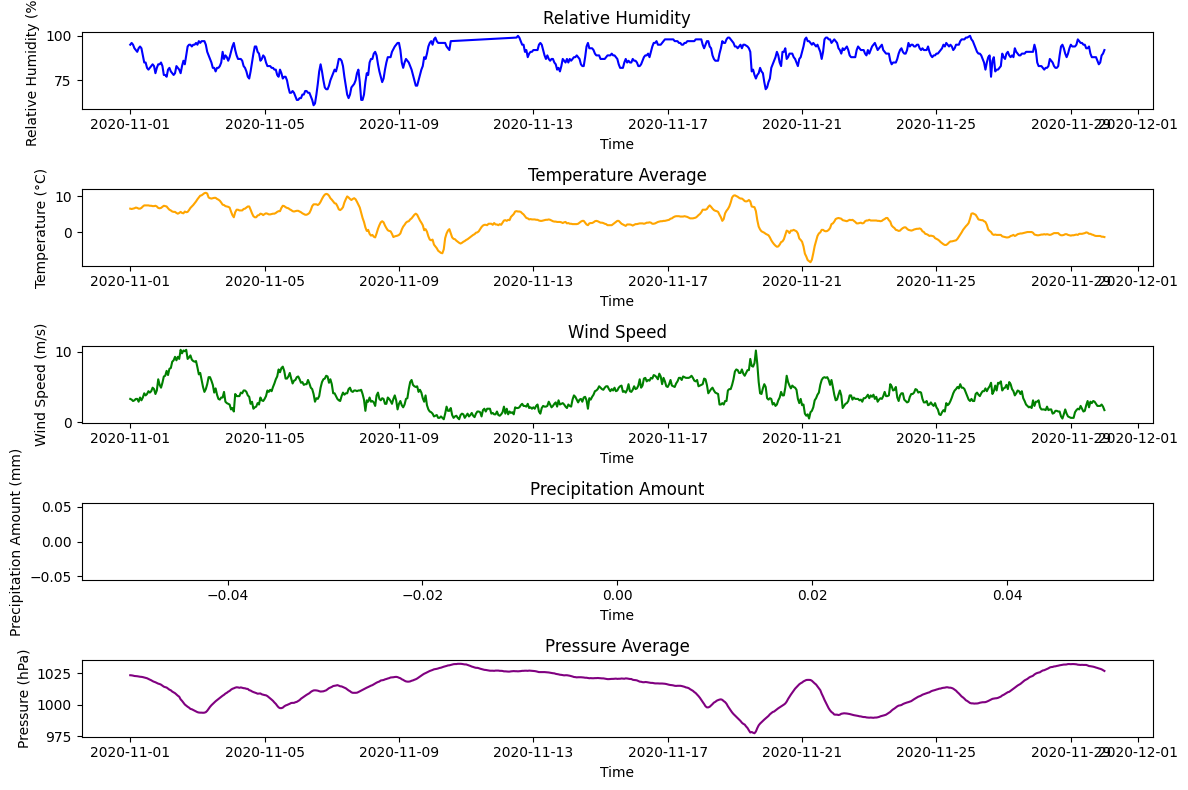

In [25]:
import matplotlib.pyplot as plt
data['Time'] = pd.to_datetime(data['Time'])

rh_data = data[data['ParameterName'] == 'RH_PT1H_AVG']
ta_data = data[data['ParameterName'] == 'TA_PT1H_AVG']
ws_data = data[data['ParameterName'] == 'WS_PT1H_AVG']
pra_data = data[data['ParameterName'] == 'PRA_PT1H_ACC']
pa_data = data[data['ParameterName'] == 'PA_PT1H_AVG']

plt.figure(figsize=(12, 8))

# Relative Humidity
plt.subplot(5, 1, 1)
plt.plot(rh_data['Time'], rh_data['ParameterValue'], color='blue')
plt.title('Relative Humidity')
plt.xlabel('Time')
plt.ylabel('Relative Humidity (%)')

# Temperature Average
plt.subplot(5, 1, 2)
plt.plot(ta_data['Time'], ta_data['ParameterValue'], color='orange')
plt.title('Temperature Average')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')

# Wind Speed
plt.subplot(5, 1, 3)
plt.plot(ws_data['Time'], ws_data['ParameterValue'], color='green')
plt.title('Wind Speed')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')

# Precipitation Amount
plt.subplot(5, 1, 4)
plt.plot(pra_data['Time'], pra_data['ParameterValue'], color='red')
plt.title('Precipitation Amount')
plt.xlabel('Time')
plt.ylabel('Precipitation Amount (mm)')

# Pressure Average
plt.subplot(5, 1, 5)
plt.plot(pa_data['Time'], pa_data['ParameterValue'], color='purple')
plt.title('Pressure Average')
plt.xlabel('Time')
plt.ylabel('Pressure (hPa)')

plt.tight_layout()
plt.show()

In [26]:
relevant_parameters = ['RH_PT1H_AVG', 'TA_PT1H_AVG', 'WS_PT1H_AVG', 'PRA_PT1H_ACC', 'PA_PT1H_AVG']
filtered_data = data[data['ParameterName'].isin(relevant_parameters)]

filtered_data['ParameterValue'] = pd.to_numeric(filtered_data['ParameterValue'], errors='coerce')

pivot_data = filtered_data.pivot_table(index='Time', columns='ParameterName', values='ParameterValue', aggfunc='mean')

average_values = pivot_data.mean()
min_values = pivot_data.min()
max_values = pivot_data.max()
median_values = pivot_data.median()
hour_with_highest_value = pivot_data.idxmax()

with open('/content/exrc-01-answer.txt', 'w') as f:
    f.write(f"relative_humidity={average_values['RH_PT1H_AVG']}\n")
    f.write(f"temperature_average={average_values['TA_PT1H_AVG']}\n")
    f.write(f"wind_speed={average_values['WS_PT1H_AVG']}\n")
    f.write(f"precipitation_amount=0.0\n")
    f.write(f"pressure_average={average_values['PA_PT1H_AVG']}\n")

<ipython-input-26-ea8ad73073df>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['ParameterValue'] = pd.to_numeric(filtered_data['ParameterValue'], errors='coerce')
